In [1]:
# Importing libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, confusion_matrix
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split

# EDA

In [2]:
train = pd.read_csv('./pima.csv')

In [3]:
train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
train.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
df_corr = train.corr()

In [6]:
df_corr['Outcome']

Pregnancies                 0.221898
Glucose                     0.466581
BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
BMI                         0.292695
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
Name: Outcome, dtype: float64

### 독립변수, 종속변수 정리

- Feature (X, 독립 변수)

    1. Pregnancies - Number of times pregnant
    1. Glucose - Plasma glucose concentration a 2 hours in an oral glucose tolerance test
    1. BloodPressure
    1. Skin_Thickness - Triceps skin fold thickness (mm)
    1. Insulin - 2-Hour serum insulin (mu U/ml)
    1. BMI - Body mass index (weight in kg/(height in m)^2)
    1. DiabetesPedigreeFunction - Diabetes pedigree function
    1. Age
    

- Target

    1. Outcome = 당뇨병 여부 ( 0 = 정상, 1 = 당뇨 )

In [7]:
train.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# 시각화

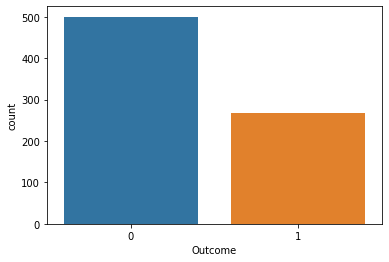

In [9]:
# 당뇨병 유무에 대한 빈도수

sns.countplot(x = 'Outcome', data = train)

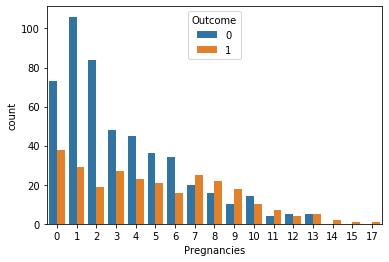

In [10]:
# 임신횟수와 당뇨병과의 관계

sns.countplot(x ='Pregnancies', hue = 'Outcome', data = train)

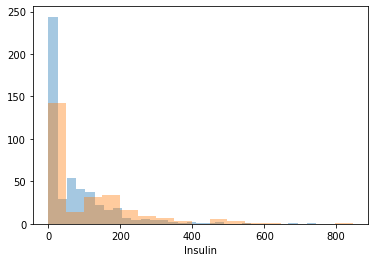

In [11]:
# 인슐린과 당뇨병과의 관계

sns.distplot(train.Insulin.loc[train['Outcome'] == 0], kde = False)
sns.distplot(train.Insulin.loc[train['Outcome'] == 1], kde = False)

# 빨간색이 당뇨병 환자

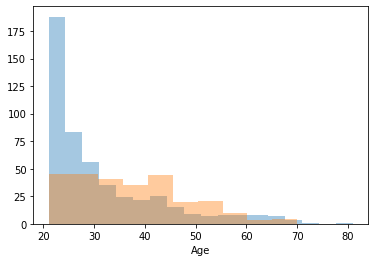

In [12]:
# 연령과 당뇨병과의 관계

sns.distplot(train.Age.loc[train['Outcome'] == 0], kde = False)
sns.distplot(train.Age.loc[train['Outcome'] == 1], kde = False)

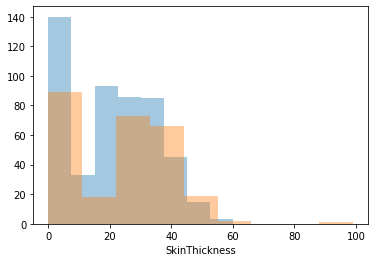

In [13]:
# 피부두께와 당뇨병과의 관계

sns.distplot(train.SkinThickness.loc[train['Outcome'] == 0], kde = False)
sns.distplot(train.SkinThickness.loc[train['Outcome'] == 1], kde = False)

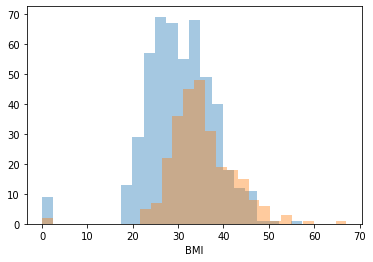

In [14]:
# BMI와 당뇨병과의 관계

sns.distplot(train.BMI.loc[train['Outcome'] == 0], kde = False)
sns.distplot(train.BMI.loc[train['Outcome'] == 1], kde = False)

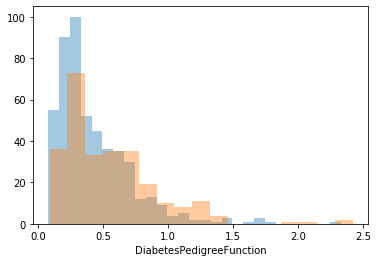

In [15]:
# 가족력과 당뇨병과의 관계

sns.distplot(train.DiabetesPedigreeFunction.loc[train['Outcome'] == 0], kde = False)
sns.distplot(train.DiabetesPedigreeFunction.loc[train['Outcome'] == 1], kde = False)

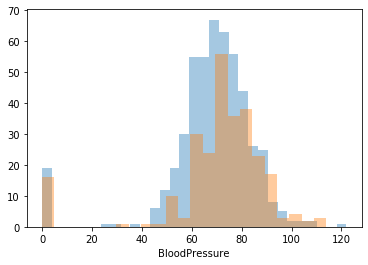

In [16]:
# 혈압과 당뇨병과의 관계

sns.distplot(train.BloodPressure.loc[train['Outcome'] == 0], kde = False)
sns.distplot(train.BloodPressure.loc[train['Outcome'] == 1], kde = False)

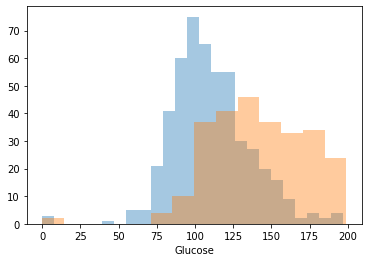

In [17]:
# 글루코스와 당뇨병과의 관계

sns.distplot(train.Glucose.loc[train['Outcome'] == 0], kde = False)
sns.distplot(train.Glucose.loc[train['Outcome'] == 1], kde = False)

- 혈압, 인슐린, BMI, 글루코스가 값이 0인 데이터가 존재.
- 0값을 결측치로 바꾸고 적절한 대체값 넣기 필요.

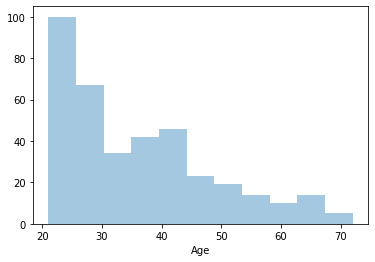

In [18]:
# 인슐린이 0인 데이터의 나이분포

sns.distplot(train.Age.loc[train['Insulin'] == 0], kde = False)

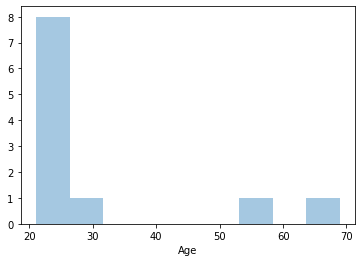

In [19]:
# BMI가 0인 데이터의 나이분포

sns.distplot(train.Age.loc[train['BMI'] == 0], kde = False)

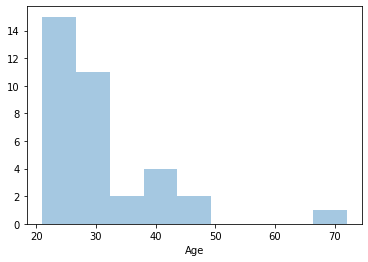

In [20]:
# 혈압이 0인 데이터의 나이분포

sns.distplot(train.Age.loc[train['BloodPressure'] == 0], kde = False)

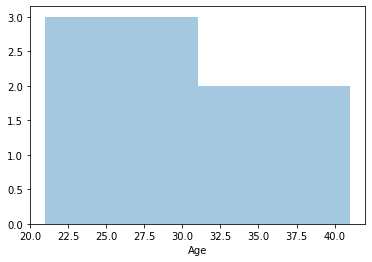

In [21]:
# 글루코스가 0인 데이터의 나이분포

sns.distplot(train.Age.loc[train['Glucose'] == 0], kde = False)

In [22]:
# 0 값을 NAN 처리.

train[['Insulin','BloodPressure', 'BMI', 'Glucose']].astype(str).replace('0', np.nan)
cols = ['BloodPressure', 'BMI', 'Glucose','Insulin']
train[cols] = train[cols].replace(['0', 0], np.nan)

In [23]:
# 인슐린의 0값의 갯수가 374로 상당히 많아 데이터전환 필요.

train[['Insulin', 'BloodPressure', 'BMI', 'Glucose']].isna().sum()

Insulin          374
BloodPressure     35
BMI               11
Glucose            5
dtype: int64

### 결측치 대체

In [24]:
#나이 카테고리

train['Age_range'] = train.Age.apply(lambda x: '20s'
                                    if x < 30
                                    else ('30s' if x <40
                                    else ('40s' if x <50
                                    else '50s and more')))

# 결측치를 나이대 평균값으로 채워주기

train['BloodPressure'].fillna(train.groupby(['Age_range'])['BloodPressure'].transform('mean'), inplace=True)
train['BMI'].fillna(train.groupby(['Age_range'])['BMI'].transform('mean'), inplace=True)
train['Glucose'].fillna(train.groupby(['Age_range'])['Glucose'].transform('mean'), inplace=True)

In [25]:
# Insulin 은 Glucose 값에 영향받음.
# 따라서 Insulin 결측치를 Glucose 평균값으로 넣어보기
# 삭제한 Insulin 칼럼 복구 후

train[['Insulin']].astype(str).replace('0', np.nan)
cols = ['Insulin']
train[cols] = train[cols].replace(['0', 0], np.nan)

train['Glucose_range'] = train.Glucose.apply(lambda x: 'normal'
                                    if x <= 140
                                    else ('high' if x <= 199
                                    else 'too high'))

train['Insulin'].fillna(train.groupby(['Glucose_range'])['Insulin'].transform('mean'), inplace=True)

In [26]:
df_corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


(9.0, 0.0)

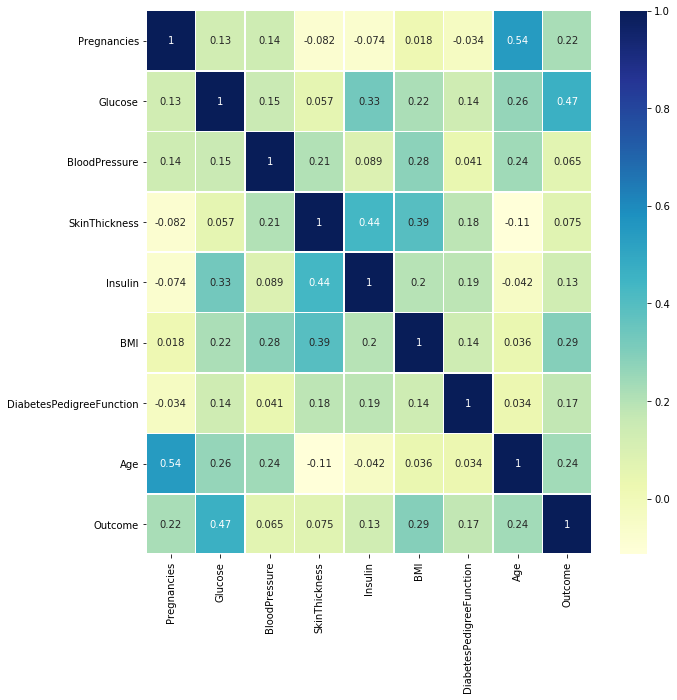

In [27]:
# 히트맵으로 상관계수 표현

fig, ax = plt.subplots(figsize = (10, 10))

sns.heatmap(df_corr,
            cmap = 'YlGnBu',
            xticklabels = df_corr.columns.values,
           yticklabels = df_corr.columns.values,
           annot = True, linewidths = .5, ax = ax)

b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values


### 더미변수 생성

In [28]:
# Insulin

train['Insulin_cat']=0
train.loc[train['Insulin']<=200,'Insulin']=0
train.loc[(train['Insulin']>200)&(train['Insulin']<=400),'Insulin_cat']=1
train.loc[(train['Insulin']>400)&(train['Insulin']<=600),'Insulin_cat']=2
train.loc[(train['Insulin']>600)&(train['Insulin']<=800),'Insulin_cat']=3
train.loc[(train['Insulin']>800)&(train['Insulin']<=1000),'Insulin_cat']=4

In [29]:
# BMI

train['BMI_cat']=0
train.loc[train['BMI']<=10,'BMI_cat']=0
train.loc[(train['BMI']>10)&(train['BMI']<=20),'BMI_cat']=1
train.loc[(train['BMI']>20)&(train['BMI']<=30),'BMI_cat']=2
train.loc[(train['BMI']>30)&(train['BMI']<=40),'BMI_cat']=3
train.loc[(train['BMI']>40)&(train['BMI']<=50),'BMI_cat']=4
train.loc[(train['BMI']>50)&(train['BMI']<=60),'BMI_cat']=5
train.loc[(train['BMI']>60)&(train['BMI']<=70),'BMI_cat']=6
train.loc[(train['BMI']>70)&(train['BMI']<=80),'BMI_cat']=7

In [30]:
# Age

train['Age_cat']=0
train.loc[train['Age']<=10,'Age']=0
train.loc[(train['Age']>10)&(train['Age']<=20),'Age_cat']=1
train.loc[(train['Age']>20)&(train['Age']<=30),'Age_cat']=2
train.loc[(train['Age']>30)&(train['Age']<=40),'Age_cat']=3
train.loc[(train['Age']>40)&(train['Age']<=50),'Age_cat']=4
train.loc[(train['Age']>50)&(train['Age']<=60),'Age_cat']=5
train.loc[(train['Age']>60)&(train['Age']<=70),'Age_cat']=6
train.loc[(train['Age']>70)&(train['Age']<=80),'Age_cat']=7

In [31]:
# Pregnancies

train['Pregnancies_cat']=0
train.loc[train['Pregnancies']<=3,'Pregnancies']=0
train.loc[(train['Pregnancies']>3)&(train['Pregnancies']<=6),'Pregnancies_cat']=1
train.loc[(train['Pregnancies']>6)&(train['Pregnancies']<=9),'Pregnancies_cat']=2
train.loc[(train['Pregnancies']>9)&(train['Pregnancies']<=12),'Pregnancies_cat']=3
train.loc[(train['Pregnancies']>12)&(train['Pregnancies']<=15),'Pregnancies_cat']=4
train.loc[(train['Pregnancies']>12)&(train['Pregnancies']<=18),'Pregnancies_cat']=5

In [32]:
# DiabetesPedigreeFunction를 더미변수로 만들기 위해 구간별로 나눠줌.

train['DiabetesPedigreeFunction_cat']=0
train.loc[train['DiabetesPedigreeFunction']<=0.5,'DiabetesPedigreeFunction']=0
train.loc[(train['DiabetesPedigreeFunction']>0.5)&(train['DiabetesPedigreeFunction']<=1),'DiabetesPedigreeFunction_cat']=1
train.loc[(train['DiabetesPedigreeFunction']>1)&(train['DiabetesPedigreeFunction']<=1.5),'DiabetesPedigreeFunction_cat']=2
train.loc[(train['DiabetesPedigreeFunction']>1.5)&(train['DiabetesPedigreeFunction']<=2.0),'DiabetesPedigreeFunction_cat']=3
train.loc[(train['DiabetesPedigreeFunction']>2.0)&(train['DiabetesPedigreeFunction']<=2.5),'DiabetesPedigreeFunction_cat']=4
train.loc[(train['DiabetesPedigreeFunction']>2.5)&(train['DiabetesPedigreeFunction']<=3.0),'DiabetesPedigreeFunction_cat']=5

In [33]:
# Glucose

train['Glucose_cat']=0
train.loc[train['Glucose']<=50,'Glucose_cat']=0
train.loc[(train['Glucose']>50)&(train['Glucose']<=100),'Glucose_cat']=1
train.loc[(train['Glucose']>100)&(train['Glucose']<=150),'Glucose_cat']=2
train.loc[(train['Glucose']>150)&(train['Glucose']<=200),'Glucose_cat']=3
train.loc[(train['Glucose']>200)&(train['Glucose']<=250),'Glucose_cat']=4

In [34]:
# BloodPressure

train['BloodPressure_cat']=0
train.loc[train['BloodPressure']<=20,'BloodPressure']=0
train.loc[(train['BloodPressure']>20)&(train['BloodPressure']<=40),'BloodPressure_cat']=1
train.loc[(train['BloodPressure']>40)&(train['BloodPressure']<=60),'BloodPressure_cat']=2
train.loc[(train['BloodPressure']>60)&(train['BloodPressure']<=80),'BloodPressure_cat']=3
train.loc[(train['BloodPressure']>80)&(train['BloodPressure']<=100),'BloodPressure_cat']=4
train.loc[(train['BloodPressure']>100)&(train['BloodPressure']<=120),'BloodPressure_cat']=5
train.loc[(train['BloodPressure']>120)&(train['BloodPressure']<=140),'BloodPressure_cat']=6

In [35]:
train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Age_range,Glucose_range,Insulin_cat,BMI_cat,Age_cat,Pregnancies_cat,DiabetesPedigreeFunction_cat,Glucose_cat,BloodPressure_cat
0,6,148.0,72.0,35,248.466667,33.6,0.627,50,1,50s and more,high,1,3,4,1,1,2,3
1,0,85.0,66.0,29,0.000000,26.6,0.000,31,0,30s,normal,0,2,3,0,0,1,3
2,8,183.0,64.0,0,248.466667,23.3,0.672,32,1,30s,high,1,2,3,2,1,3,3
3,0,89.0,66.0,23,0.000000,28.1,0.000,21,0,20s,normal,0,2,2,0,0,1,3
4,0,137.0,40.0,35,0.000000,43.1,2.288,33,1,30s,normal,0,4,3,0,4,2,1


In [36]:
df1 = pd.get_dummies(train['BMI_cat'], prefix = 'BMI_cat_' ,drop_first=True)
df3 = pd.get_dummies(train['Age_cat'], prefix = 'Age_', drop_first=True)
df4 = pd.get_dummies(train['Pregnancies_cat'], prefix = 'Pregnancies_ind_', drop_first=True)
df5 = pd.get_dummies(train['Insulin_cat'], prefix = 'Insulin_cat_', drop_first=True)
df6 = pd.get_dummies(train['DiabetesPedigreeFunction_cat'], prefix = 'DiabetesPedigreeFunction_', drop_first=True)
df7 = pd.get_dummies(train['Glucose_cat'], prefix = 'Glucose_', drop_first=True)
df8 = pd.get_dummies(train['BloodPressure_cat'], prefix = 'BloodPressure_', drop_first=True)

In [37]:
df_dummy = pd.concat([train, df1, df3, df4, df5, df6, df7, df8 ], axis=1 )
df_dummy.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Age_range,...,DiabetesPedigreeFunction__3,DiabetesPedigreeFunction__4,Glucose__1,Glucose__2,Glucose__3,BloodPressure__2,BloodPressure__3,BloodPressure__4,BloodPressure__5,BloodPressure__6
0,6,148.0,72.0,35,248.466667,33.6,0.627,50,1,50s and more,...,0,0,0,1,0,0,1,0,0,0
1,0,85.0,66.0,29,0.000000,26.6,0.000,31,0,30s,...,0,0,1,0,0,0,1,0,0,0
2,8,183.0,64.0,0,248.466667,23.3,0.672,32,1,30s,...,0,0,0,0,1,0,1,0,0,0
3,0,89.0,66.0,23,0.000000,28.1,0.000,21,0,20s,...,0,0,1,0,0,0,1,0,0,0
4,0,137.0,40.0,35,0.000000,43.1,2.288,33,1,30s,...,0,1,0,1,0,0,0,0,0,0


In [38]:
# 더미변수와 유의미한 독립변수를 제외한 나머지 제거

df_dummy.drop(['Glucose_range','Age_range','Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age'], axis=1, inplace=True)
df_dummy.head()

,Outcome,Insulin_cat,BMI_cat,Age_cat,Pregnancies_cat,DiabetesPedigreeFunction_cat,Glucose_cat,BloodPressure_cat,BMI_cat__2,BMI_cat__3,...,DiabetesPedigreeFunction__3,DiabetesPedigreeFunction__4,Glucose__1,Glucose__2,Glucose__3,BloodPressure__2,BloodPressure__3,BloodPressure__4,BloodPressure__5,BloodPressure__6
0,1,1,3,4,1,1,2,3,0,1,...,0,0,0,1,0,0,1,0,0,0
1,0,0,2,3,0,0,1,3,1,0,...,0,0,1,0,0,0,1,0,0,0
2,1,1,2,3,2,1,3,3,1,0,...,0,0,0,0,1,0,1,0,0,0
3,0,0,2,2,0,0,1,3,1,0,...,0,0,1,0,0,0,1,0,0,0
4,1,0,4,3,0,4,2,1,0,0,...,0,1,0,1,0,0,0,0,0,0


In [39]:
df_dummy.Survived = df_dummy.Outcome.astype(int)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [40]:
df_corr = df_dummy.corr()
df_corr = df_corr['Outcome']

In [41]:
# 상관계수의 절대값이 어느정도 보장된 변수들만 남아있음. 이를 이용하여 모델학습

df_corr[abs(df_corr) > 0.1]

Outcome                         1.000000
Insulin_cat                     0.284141
BMI_cat                         0.300959
Age_cat                         0.239448
Pregnancies_cat                 0.224801
DiabetesPedigreeFunction_cat    0.171225
Glucose_cat                     0.453753
BloodPressure_cat               0.172361
BMI_cat__2                     -0.261544
BMI_cat__3                      0.166079
BMI_cat__4                      0.148303
Age__2                         -0.304441
Age__3                          0.143698
Age__4                          0.189458
Age__5                          0.129886
Pregnancies_ind__2              0.204057
Insulin_cat__1                  0.294540
DiabetesPedigreeFunction__1     0.108713
DiabetesPedigreeFunction__2     0.129938
Glucose__1                     -0.335539
Glucose__3                      0.397267
BloodPressure__2               -0.152851
BloodPressure__4                0.109417
Name: Outcome, dtype: float64

# 모델링

In [42]:
y = df_dummy['Outcome']
y.shape

(768,)

In [43]:
X = df_dummy.drop('Outcome', axis=1)
X.shape

(768, 38)

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=10)

In [45]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(537, 38)
(231, 38)
(537,)
(231,)


In [46]:
# 의사결정나무

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

model=DecisionTreeClassifier()
model.fit(X_train, y_train)
prediction4=model.predict(X_test)

print('The accuracy of the Decision Tree is', accuracy_score(prediction4, y_test))
print('The recall of the Decision Tree is', recall_score(prediction4, y_test))
print('The f1_score of the Decision Tree is', f1_score(prediction4, y_test))

The accuracy of the Decision Tree is 0.7012987012987013
The recall of the Decision Tree is 0.6451612903225806
The f1_score of the Decision Tree is 0.5369127516778524


## 교차검증(K-Fold)

In [48]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction

kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts
xyz = []
accuracy = []
std = []

classifiers = ['Decision Tree']

models = [DecisionTreeClassifier()]

for i in models:
    model = i
    cv_result = cross_val_score(model,X,y, cv = kfold, scoring = "accuracy")
    cv_result = cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
    
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
new_models_dataframe2

,CV Mean,Std
Decision Tree,0.699214,0.052107


### Learning curve 시각화

In [49]:
# Plot learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Validation score")

    plt.legend(loc="best")
    return plt

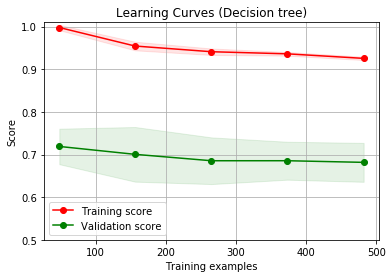

In [50]:
# Plot learning curves
# 샘플수 마다 Score값이 같기 때문에 과적합x

from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve

title = "Learning Curves (Decision tree)"
cv = 10
plot_learning_curve(model, title, X_train, y_train, ylim=(0.5, 1.01), cv=cv, n_jobs=1);

### 중요변수 상위10개와 하위10개

In [51]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(a.feature_importances_,5)})
importances = importances.sort_values('importance',ascending=False)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


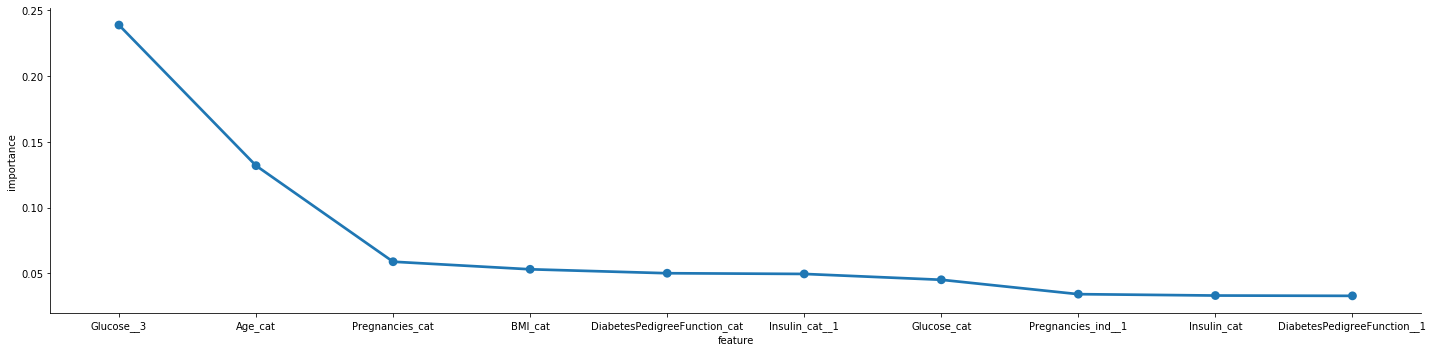

In [52]:
importances_most = importances.head(10) # 10 most important features
axes = sns.factorplot('feature','importance', 
                      data=importances_most, aspect = 4, )

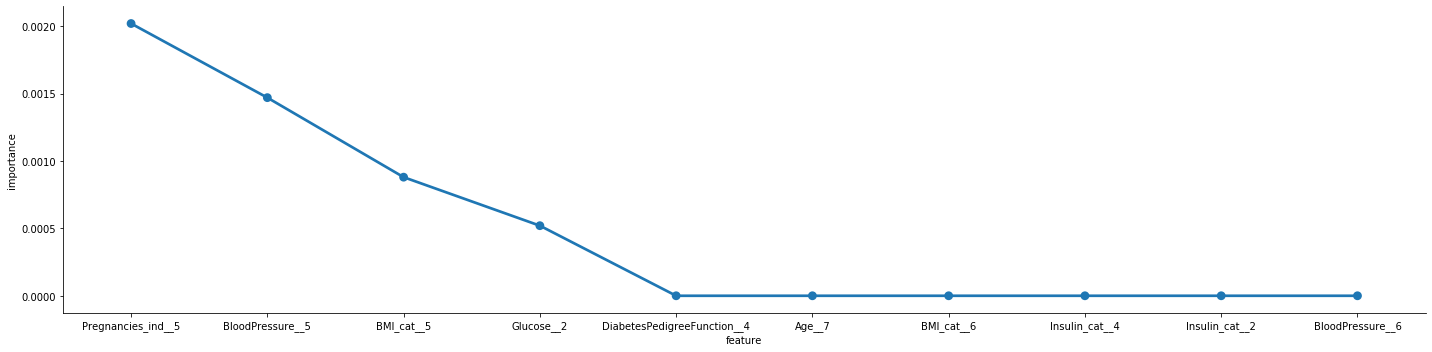

In [53]:
importances_least = importances.tail(10) # least 10 important features
axes = sns.factorplot('feature','importance', 
                      data=importances_least, aspect = 4,)

## 하이퍼파라미터 튜닝

In [54]:
clf = DecisionTreeClassifier()

In [55]:
# Hyperparameter Optimization
parameters = {'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10, 50], 
              'min_samples_split': [2, 3, 50, 100],
              'min_samples_leaf': [1, 5, 8, 10]
             }

# Run the grid search
grid_obj = GridSearchCV(clf, parameters)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
clf = grid_obj.best_estimator_

# Train the model using the training sets 
clf.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
                       max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [56]:
y_pred = clf.predict(X_test)

In [57]:
y_pred = clf.predict(X_test)
acc_ac = accuracy_score(y_test, y_pred)
acc_pr = precision_score(y_test, y_pred)
acc_re = recall_score(y_test, y_pred)
acc_f1 = f1_score(y_test, y_pred)
print( 'Accuracy of Decision Tree model : ', acc_ac )
print( 'Precision of Decision Tree model : ', acc_pr )
print( 'Recall of Decision Tree model : ', acc_re )
print( 'F1_score of Decision Tree model : ', acc_f1 )

Accuracy of Decision Tree model :  0.696969696969697
Precision of Decision Tree model :  0.6231884057971014
Recall of Decision Tree model :  0.4942528735632184
F1_score of Decision Tree model :  0.5512820512820513


### Precision Recall Curve

In [58]:
from sklearn.metrics import precision_recall_curve

# getting the probabilities of our predictions
y_scores = clf.predict_proba(X_train)
y_scores = y_scores[:,1]

precision, recall, threshold = precision_recall_curve(y_train, y_scores)

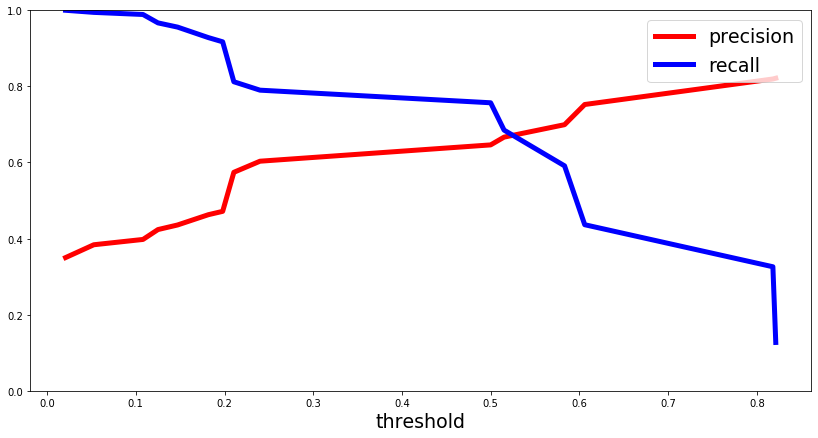

In [59]:
def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "r-", label="precision", linewidth=5)
    plt.plot(threshold, recall[:-1], "b", label="recall", linewidth=5)
    plt.xlabel("threshold", fontsize=19)
    plt.legend(loc="upper right", fontsize=19)
    plt.ylim([0, 1])

plt.figure(figsize=(14, 7))
plot_precision_and_recall(precision, recall, threshold)
plt.show()

### ROC AUC Curve

In [60]:
from sklearn.metrics import roc_curve
# compute true positive rate and false positive rate
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, y_scores)

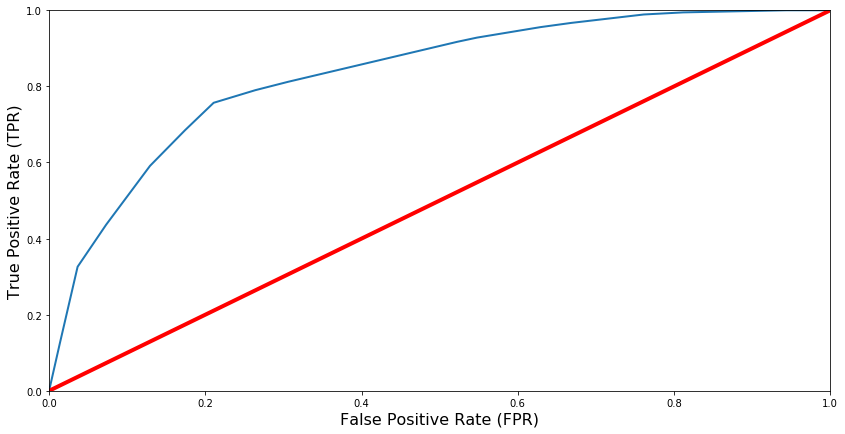

In [61]:
# plotting them against each other
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1.0, 0, 1.0])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)

plt.figure(figsize=(14, 7))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

In [62]:
from sklearn.metrics import roc_auc_score
r_a_score = roc_auc_score(y_train, y_scores)
print("ROC-AUC-Score:", r_a_score)

ROC-AUC-Score: 0.8323219939164442
